# **IT8x20 Special Topic in Information Technology (Machine Learning and AI)**

# Assignment 2

**Student ID:** 22201670

**Student Name:** Sachith M. Gunawardane

## Connect Google Drive

It was decided that Google Drive will be used to 

* Save Model in HDF5 format (prerequisite)
* Hold video files (prerequisite)
* Images for scenarios  

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


## Read Video (mp4) and Extract Images

Below function (capture_frames) will have following functionality 

* Input parameters 
    1.   Path to video files  
    2.   Path to image base folder 
    3.   Number of images required to be captured 

* Video folder can hold subfolders. 

* Image folders will be created per video. Video name will be used as last/final folder to place images. (Manual creation of folders not required)

* Returns following as List
    1.   Scenario
    2.   Path to Scenario
    3.   Class Name based on Video file name 

In [ ]:
# Global parameters for image/frame capturing 
video_folder = '/content/gdrive/MyDrive/Assignment2/Videos'
image_folder = '/content/gdrive/MyDrive/Assignment2/Images'
no_of_frames = 100

In [ ]:
import os
import numpy as np
import cv2 as cv

# function to extract frames from videos
# this will create image folder and place all images for each scenario 
# Most important is the list (scenario) return by this function because it been used to retrieve images 
# If images are already generated, no need to run this function. U can get scenarios from save list in google drive 
def capture_frames(path_for_video, path_for_images, no_of_frames):

  scenario = []
  scenario_path = []
  class_name = []

  for file_path in os.walk(path_for_video):
    # Check folder contain files 
    if len(file_path[2]) > 0:
      # Loop each file 
      for filename in file_path[2]:
        folder_for_images = file_path[0]+ '/' + filename[0:len(filename)-4]
        folder_for_images = folder_for_images.replace(path_for_video, path_for_images)

        # if not exists, create folder structure to hold images 
        if not os.path.exists(folder_for_images):
          os.makedirs(folder_for_images)

        # Read the movie 
        videoCap = cv.VideoCapture(file_path[0]+'/'+filename)

        #capture number of frames per second available in video 
        fps = videoCap.get(cv.CAP_PROP_FPS)
        #capture number of total frames available 
        totFrames = videoCap.get(cv.CAP_PROP_FRAME_COUNT)
        interval = (totFrames - 50) // no_of_frames

        # Read frames from video
        # start from 50 to skip intial frames  
        next_frame = 50
        for count in range(1, no_of_frames + 1):
          videoCap.set(cv.CAP_PROP_POS_FRAMES, int(next_frame))
          success, image = videoCap.read()
          if success:
            imageName = folder_for_images +'/' + filename[0:len(filename)-4] + '%d.jpg' % count
            cv.imwrite(imageName, image)
          
            next_frame = next_frame + interval
            if next_frame > totFrames:
              next_frame = totFrames
        
        scenario.append( filename[0:len(filename)-4])
        scenario_path.append(folder_for_images)
        class_name.append('new_without_mask' if 'without' in filename else 'new_with_mask')

       
  return [np.array([scenario, scenario_path, class_name]).T]


In [ ]:
scenario = []

In [ ]:
# Important: Run only if images folder or images were not extrcted 
# This section take 5 to 6 min 
scenario = capture_frames(video_folder, image_folder, no_of_frames)


## Important 

The "scenario" variable is used throughout the code get,
* Scenario name (e.g.: Sunny with Mask, Sunny without Mask)
* The folder path for the scenario with all relevant images. 
* Class name 

This "scenario" variable/parameter is created while capturing frames from video files. Therefore, for ease of use, I have saved this list on Google drive and retrieved it so that we don't have to run "capture_frame" function every time.

In [ ]:
import pickle
print(type(scenario))
print(scenario)

<class 'list'>
[]


In [ ]:
# Important: prerequisite to run this is block 5 scenario creation from capture_frames function 
# Save list to file 
with open('/content/gdrive/MyDrive/Assignment2/Miscellaneous/scenario_list.pkl','wb') as f:
  pickle.dump(scenario, f)

In [ ]:
# Load list from file 
with open('/content/gdrive/MyDrive/Assignment2/Miscellaneous/scenario_list.pkl','rb') as f:
  scenario = pickle.load(f)

In [ ]:
print(type(scenario))
print(scenario)

<class 'list'>
[array([['Cloudy_withMask',
        '/content/gdrive/MyDrive/Assignment2/Images/Cloudy_withMask',
        'new_with_mask'],
       ['Sunny_withMask',
        '/content/gdrive/MyDrive/Assignment2/Images/Sunny_withMask',
        'new_with_mask'],
       ['Sunny_withoutMask',
        '/content/gdrive/MyDrive/Assignment2/Images/Sunny_withoutMask',
        'new_without_mask'],
       ['Indoor_Artificial_withMask',
        '/content/gdrive/MyDrive/Assignment2/Images/Indoor_Artificial_withMask',
        'new_with_mask'],
       ['Indoor_Artificial_withoutMask',
        '/content/gdrive/MyDrive/Assignment2/Images/Indoor_Artificial_withoutMask',
        'new_without_mask'],
       ['Indoor_Natural_withMask',
        '/content/gdrive/MyDrive/Assignment2/Images/Indoor_Natural_withMask',
        'new_with_mask'],
       ['Indoor_Natural_withoutMask',
        '/content/gdrive/MyDrive/Assignment2/Images/Indoor_Natural_withoutMask',
        'new_without_mask'],
       ['Shadow_withMask

Function call to capture_frames creates 
* folders for each scenario
* 100 images/frames from video into those scenarios 
* return matrix with all scenarios. First row for example

 ['Cloudy_withMask'
 '/content/gdrive/MyDrive/Assignment2/Images/Cloudy_withMask'
 'new_with_mask']

**Folder structure**

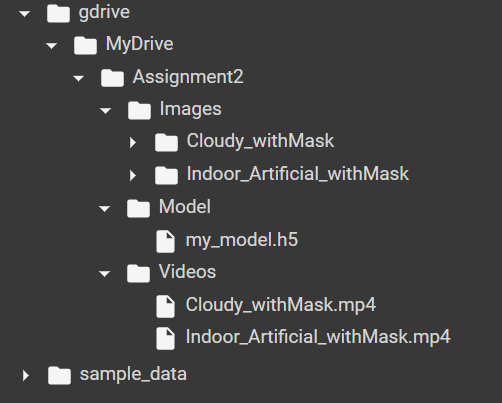

## Load Libraries 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from termcolor import colored
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.utils.vis_utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from google.colab.patches import cv2_imshow
from glob import glob 

from tensorflow.keras.applications.resnet_v2 import ResNet101V2
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import DenseNet201

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from IPython.display import clear_output

import warnings
warnings.filterwarnings('ignore')

## Load Custom Pre-Trained Model 

The model uses MobileNet2 as its backbone and has been trained on a dataset published on Kaggle. 

[Link to Dataset used for training.](https://www.kaggle.com/datasets/prasoonkottarathil/face-mask-lite-dataset)

This dataset is a collection of 20000 images in 2 different classes, each class having 10000. All the images with the face mask are scrapped from google search and all the images without the face mask are preprocessed from the CelebFace dataset created on Kaggle.   

In [ ]:
#model_path_mobilenet = '/content/gdrive/MyDrive/Assignment2/Model/mobilenet.h5'
#model_path_resnet = '/content/gdrive/MyDrive/Assignment2/Model/resnet101v2.h5'
#model_path_vgg19 = '/content/gdrive/MyDrive/Assignment2/Model/vgg19.h5'
model_path_vgg16 = '/content/gdrive/MyDrive/Assignment2/Model/vgg16.h5'
#model_path_densenet = '/content/gdrive/MyDrive/Assignment2/Model/densenet.h5'

model = load_model(model_path_vgg16)

### Model Details

In [ ]:
print("Total Params:", model.count_params())
model.summary()

Total Params: 18909378
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               4194432   
                                                                 
 dense_7 (Dense)             (None, 2)                 258       
                                                                 
Total params: 18,909,378
Trainable params: 4,194,690
Non-trainable params: 14,714,688
_________________________________________________________________


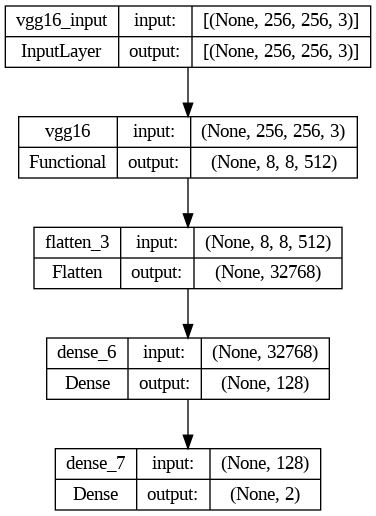

In [ ]:
model_plot_path = '/content/gdrive/MyDrive/Assignment2/Model/my_model_plot.png'
plot_model(model, to_file=model_plot_path, show_shapes=True, show_layer_names=True)

In [ ]:
!pip install visualkeras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 kB 21.2 MB/s eta 0:00:00


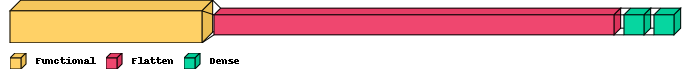

In [ ]:
import visualkeras
visualkeras.layered_view(model, legend=True) # without custom font


## Load Images based on Scenarios for Prediction

In [ ]:
# Constants and common parameters 
IMG_SIZE = 256
class_names = ['new_with_mask','new_without_mask']

## Data Augmentation

Videos were captured to have a single person in the frame covering 30% - 50% of the frame. This allows the foreground to have a person and the background to be any other object. 

Initial prediction on based image (30% person and 70% background) shows that the model fails to classify images correctly. All images were classified as “new_without_mask” which is kind of default outcome when system is not able to predict. 

Reason to failure was obvious when you investigate training dataset of the model. Training dataset is with grayscale images with close portrait of person. 

Therefore, pre-processing of images was needed before sending in model. Considering assignment parameters following experiments were preformed, 

**Experiment 1:**

Crop images to hold person with less background and send to model. 

*Cropping:*

It was important to detect person in the image to perform cropping. 

*	Using cv2.cascadeClassifier with 'haarcascade_frontalface_default.xml', 'haarcascade_eye.xml' failed. Face detection did not work when person is waring mask. Without detecting face boundary, it difficult isolate eyes position from the return values of eye detection. Due to these issues using cv2.cascadeClassifier was drop for this purpose.  

* Finally, it was decided to use another model with transfer learning to detect face boundaries. SSD (res10_300x300_ssd_iter_140000_fp16.caffemodel) was use to identify face coordinates and crop image. 

**Experiment 2:**

Perform Bluer,  Grayscale, image Intensity and Sharpening augmentation  on top of image return by experiment 1. 

**Experiment 3:**

Perform Bluer, contrast, brightness, Grayscale, image Intensity and Sharpening augmentation  on top of image return by experiment 1. Contrast and brightness augmentation is the extra step in experiment 3



In [ ]:
# Augmentation function 
def image_augmentation(exp, img):
  ''' This  is Augmentation function 
  Input Parametes
     exp : Integer (Values expected is 1, 2, 3)
     img : image (return by cv2.imread, numpy.ndarray)
  Return Parameters 
     img : image (numpy.ndarray) augmented image based on experiment define
  for example experiment 2 request, function will perform code for experiment 1 and 2'''

  # Face Detection using DNN Net
  def detectFaceOpenCVDnn(net, frame, conf_threshold=0.7):
    
    top_buffer = 100
    buttom_buffer = 50
    left_right_buffer = 50 
    
    frameHeight = frame.shape[0]
    frameWidth = frame.shape[1]
    blob = cv.dnn.blobFromImage(frame, 1.0, (300, 300), [104, 117, 123], False, False,)
    
    net.setInput(blob)
    detections = net.forward() 
    
    #Loop to find correct coordinate with based on confident
    for i in range(detections.shape[2]):
      confidence = detections[0, 0, i, 2]
      if confidence > conf_threshold:
        x1 = int(detections[0, 0, i, 3] * frameWidth)
        y1 = int(detections[0, 0, i, 4] * frameHeight)
        x2 = int(detections[0, 0, i, 5] * frameWidth)
        y2 = int(detections[0, 0, i, 6] * frameHeight)

        top=x1
        right=y1
        bottom=x2-x1
        left=y2-y1
        a = right - top_buffer
        if a < 0: 
          a = 0
        elif a > frameHeight:
          a = frameHeight

        b = right + left + buttom_buffer
        if b < 0: 
          b = 0
        elif b > frameWidth:
          b = frameWidth

        c =  top - left_right_buffer
        if c < 0: 
          c = 0
        elif c > frameHeight:
          c = frameHeight -10


        d = top + bottom  + left_right_buffer
        if d < 0: 
          d = 0
        elif d > frameWidth:
          d = frameWidth -10


        frame = frame[a : b , c: d] 



    return frame
 
  # Experiment 1
  # crop image
  # load face detection model from Google Drive 
  modelFile = "/content/gdrive/MyDrive/Assignment2/SSD/res10_300x300_ssd_iter_140000_fp16.caffemodel" 
  configFile = "/content/gdrive/MyDrive/Assignment2/SSD/deploy.prototxt.txt"

  net = cv.dnn.readNetFromCaffe(configFile, modelFile)
  net.setPreferableBackend(cv.dnn.DNN_BACKEND_CUDA)
  net.setPreferableTarget(cv.dnn.DNN_TARGET_CUDA)

  frame = cv.resize(img, (640, 480))
  frame = detectFaceOpenCVDnn(net, frame)

  # Add Blue 
  if exp in (2,3):
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    # Create a mask based on medium to high Saturation and Value
    # These values can be changed (the lower ones) to fit your environment
    mask = cv.inRange(hsv, (0, 75, 40), (180, 255, 255))
    # We need a to copy the mask 3 times to fit the frames
    mask_3d = np.repeat(mask[:, :, np.newaxis], 3, axis=2)
    # Create a blurred frame using Gaussian blur
    blurred_frame = cv.GaussianBlur(frame, (25, 25), 0)
    # Combine the original with the blurred frame based on mask
    frame = np.where(mask_3d == (255, 255, 255), frame, blurred_frame)
  
  #contrast and brightness
  if exp == 3:
    
    # Define the alpha and beta values for contrast and brightness adjustment
    alpha = 1  # contrast
    beta = 30  # brightness

    # Adjust the contrast and brightness of the image
    frame = cv.convertScaleAbs(frame, alpha=alpha, beta=beta)



  # Add Grayscale, Intensity and Sharpening 
  if exp in (2,3):
    # convert to grayscale of each frames
    frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    # convert data type
    frame = frame.astype('float32')

    # shift pixel intensity by a constant
    intensity_shift = 100
    frame += intensity_shift

    # another option is to use a factor value > 1:
    # gray *= factor_intensity

    # clip pixel intensity to be in range [0, 255]
    frame = np.clip(frame, 0, 255)

    # change type back to 'uint8'
    frame = frame.astype('uint8')

    # Create the sharpening kernel
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    # Apply the sharpening kernel to the image using filter2D
    frame = cv.filter2D(frame, -1, kernel)
  
 

  return frame

In [ ]:
# Create Images for Experiment

def create_experiment_images(exp):
  for condition in scenario[0]:
    org_folder_path = condition[1]

    new_sub_fol = 'Images/Experiment' + str(exp)
    new_fol_path = org_folder_path.replace('Images', new_sub_fol)

    #create folder if not exists 
    if not os.path.exists(new_fol_path):
      os.makedirs(new_fol_path) 
    
    #read images for processing 
    filenames = glob(org_folder_path+ '/*.jpg')
    for filename in filenames:
      frameOrig = cv.imread(filename)
      # call augmentation 
      augImage = image_augmentation(exp,frameOrig)

      cv.imwrite(filename.replace('Images', new_sub_fol), augImage)


  return None 



In [ ]:
# Important 
# Run this only if Experiment images were not created in Google Drive 
# You can verify by going to '/content/gdrive/MyDrive/Assignment2/Images' path and checking follwing folders
# Experiment1 , Experiment2 and Experiment3 
# each of the above folders will have subfolders for scenario and images under those 
# This function take 8 to 10 min to run

# Create images for all 3 experiments 
for i in range(1,4):
  create_experiment_images(i)

### Create Dataset for Prediction



In [ ]:
#create dataset for prediction 
def make_dataset(scenario, exp):

  scenario_name = scenario[0]
  path_to_scenario = scenario[1]
  new_sub_fol = 'Images/Experiment' + str(exp)
  path_to_scenario = path_to_scenario.replace('Images', new_sub_fol)
  class_label = class_names.index(scenario[2])
   
  def parse_image(filename):
    image = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = tf.reshape(image,[1, 256, 256, 3])
    image = image/255.0
    return image
  
  filenames = glob(path_to_scenario+ '/*.jpg')
  labels = [class_label for i in range(len(filenames))]

  filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
  images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
  labels_ds = tf.data.Dataset.from_tensor_slices(labels)

  ds = tf.data.Dataset.zip((images_ds, labels_ds))
  
  return ds 



### Predict each scenario for experiment 

In [ ]:
def predict_for_experiment(exp):
  
  df = pd.DataFrame()
  
  for condition in scenario[0]:
    scenario_ds  = make_dataset(condition, exp)
    
    # Predict with the new dataset 
    pred_ds = model.predict(scenario_ds)
    pred_labels = np.argmax(pred_ds, axis = 1)

    # Extract actual label from dataset 
    actual_labels = []
    for image, label in scenario_ds:
      actual_labels.append(label.numpy())

    actual_labels = np.array(actual_labels)

    # Plot confusion matrix for each scenario
    cm = confusion_matrix(actual_labels, pred_labels)

    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', yticklabels=class_names, xticklabels=class_names)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Experiment-'+str(exp) +'-' + condition[0] , size = 15)

    print(classification_report(actual_labels, pred_labels,labels = [0, 1], target_names=class_names))

    df[condition[0] + '_Actual'] = actual_labels
    df[condition[0] + '_Predict'] = pred_labels 

  return df



100/100 [==============================] - 1s 10ms/step
                  precision    recall  f1-score   support

   new_with_mask       0.00      0.00      0.00     100.0
new_without_mask       0.00      0.00      0.00       0.0

        accuracy                           0.00     100.0
       macro avg       0.00      0.00      0.00     100.0
    weighted avg       0.00      0.00      0.00     100.0

100/100 [==============================] - 1s 9ms/step
                  precision    recall  f1-score   support

   new_with_mask       1.00      0.13      0.23       100
new_without_mask       0.00      0.00      0.00         0

        accuracy                           0.13       100
       macro avg       0.50      0.07      0.12       100
    weighted avg       1.00      0.13      0.23       100

100/100 [==============================] - 1s 9ms/step
                  precision    recall  f1-score   support

   new_with_mask       0.00      0.00      0.00         0
new_without_mas

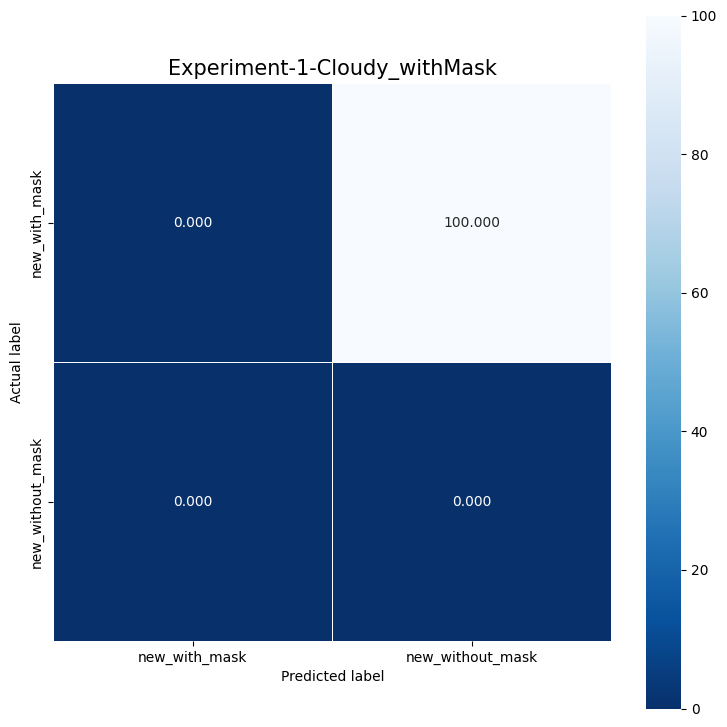

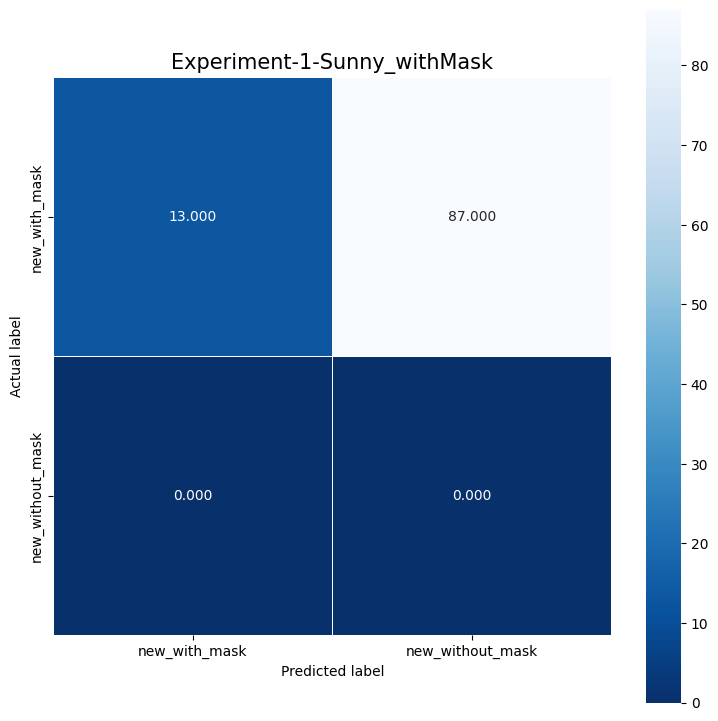

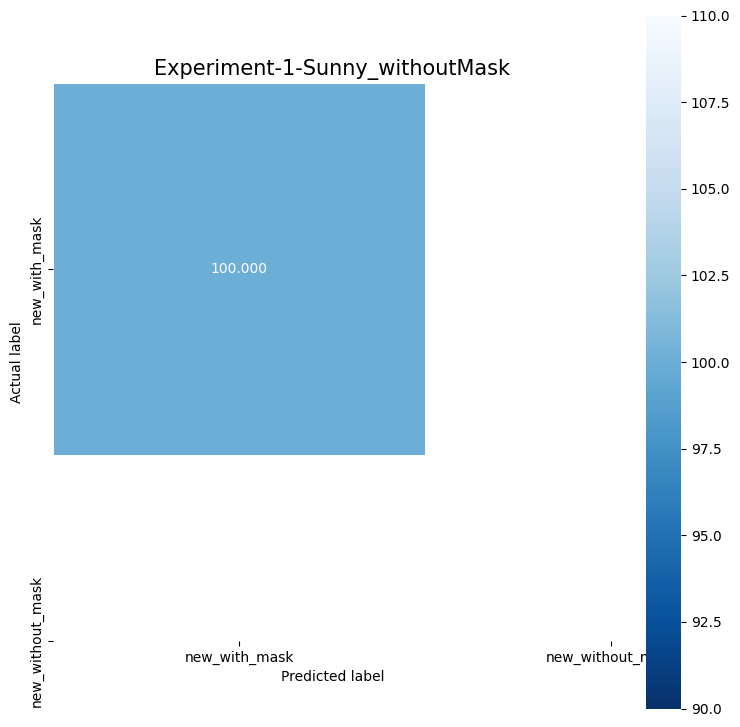

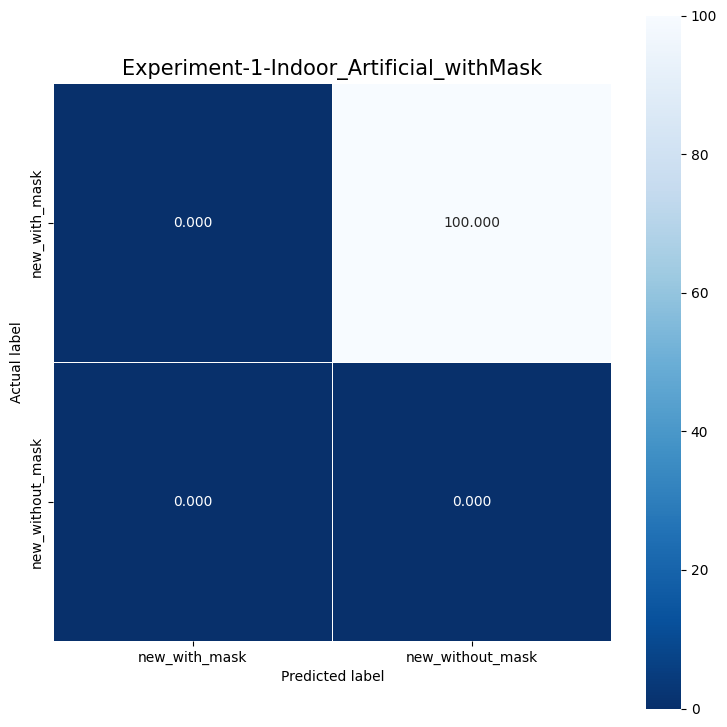

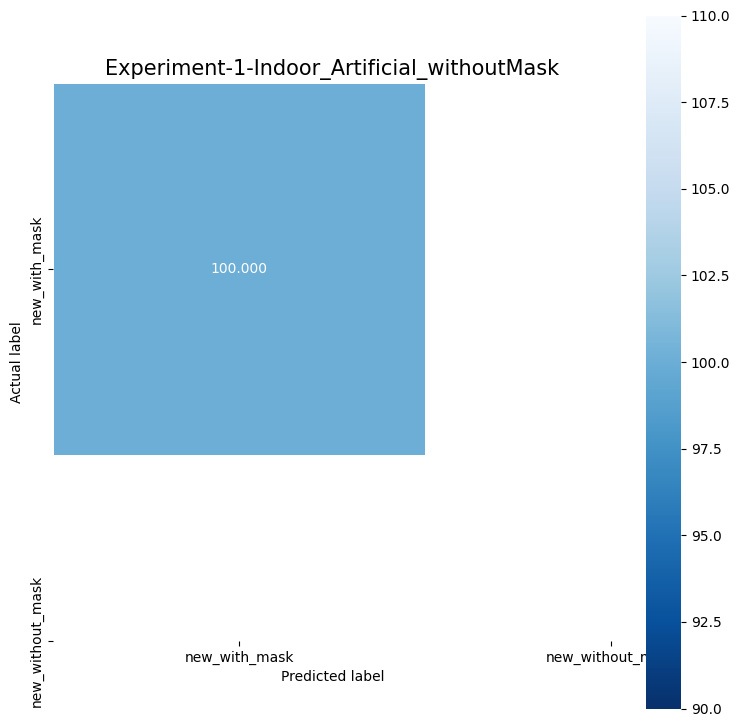

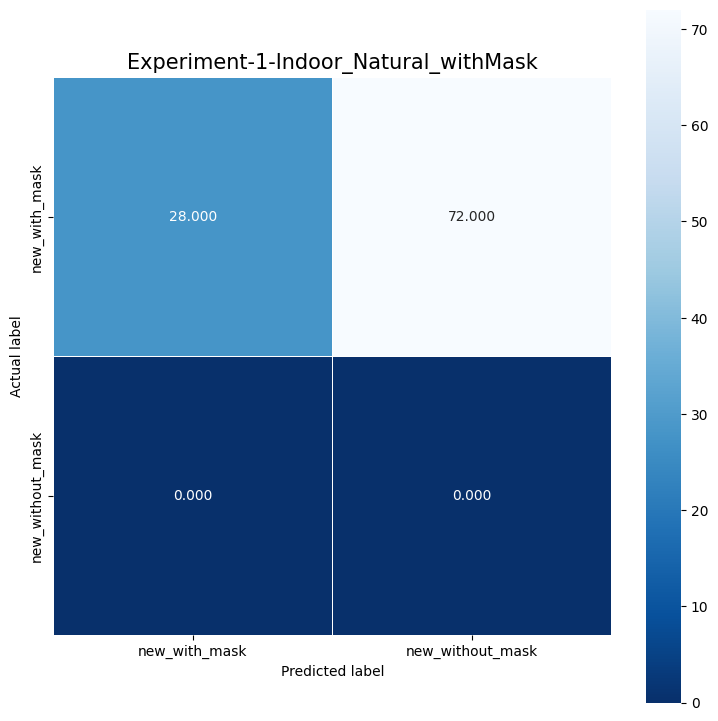

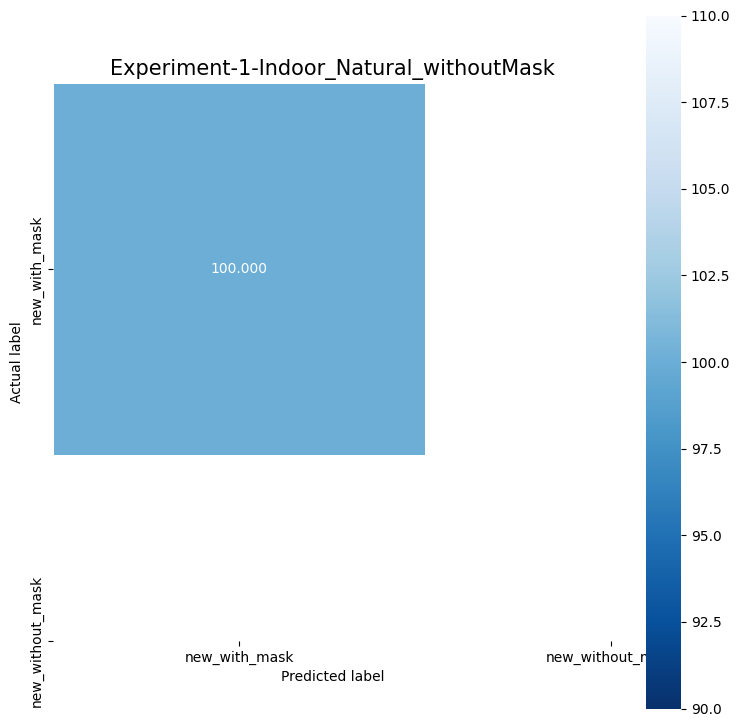

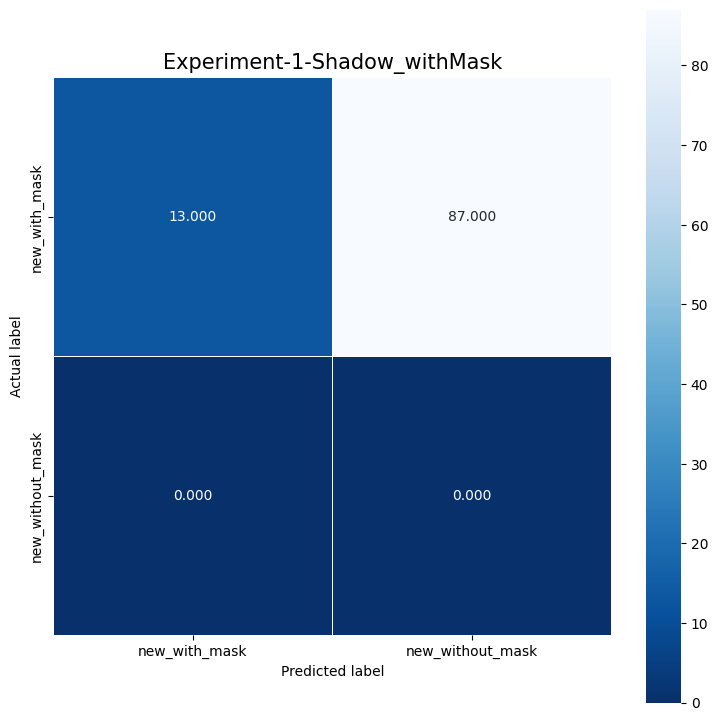

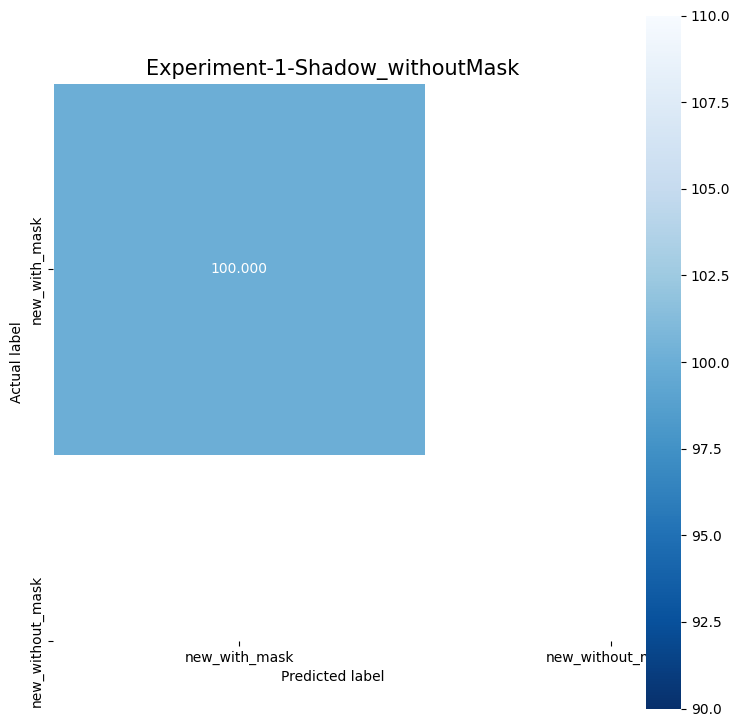

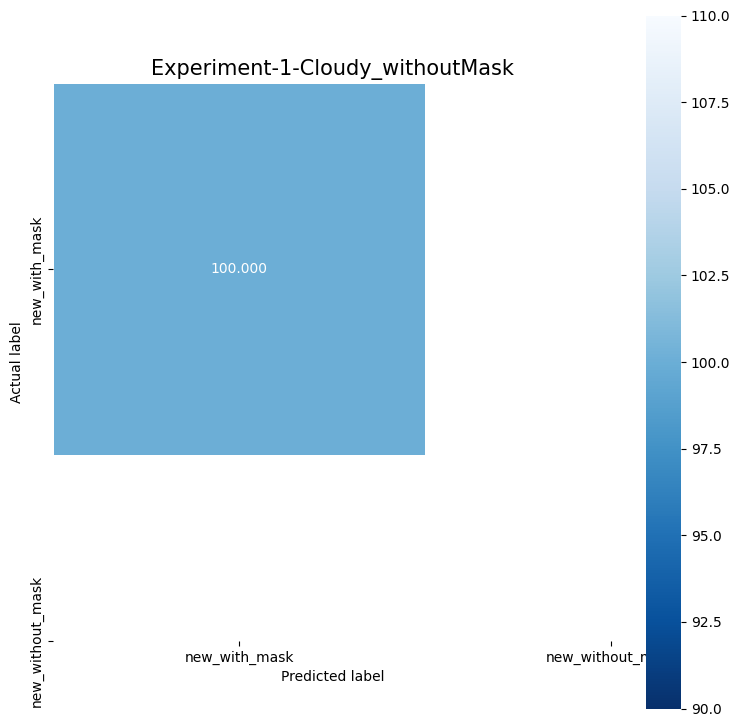

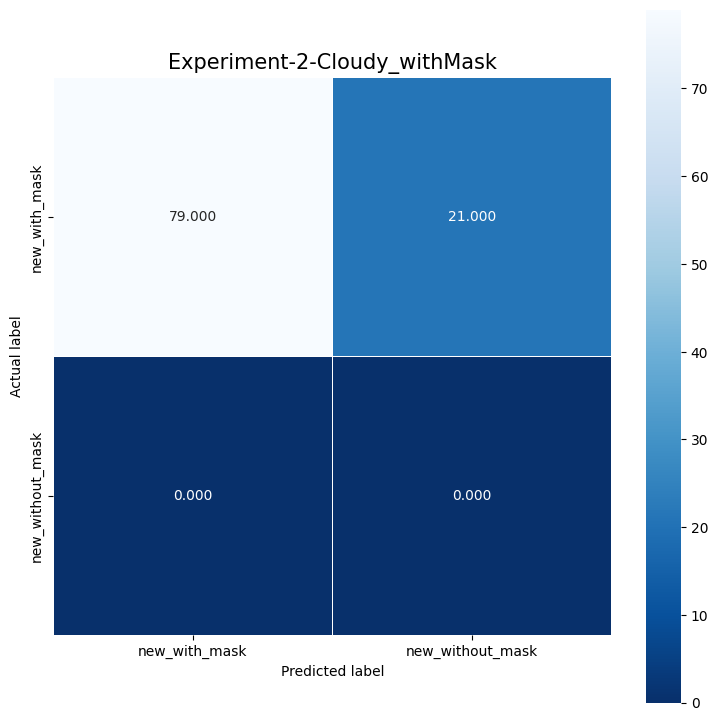

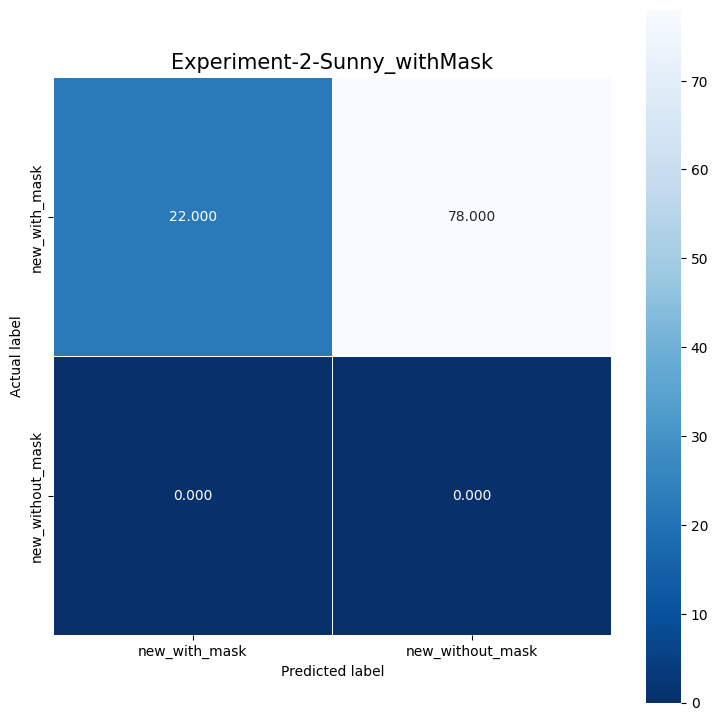

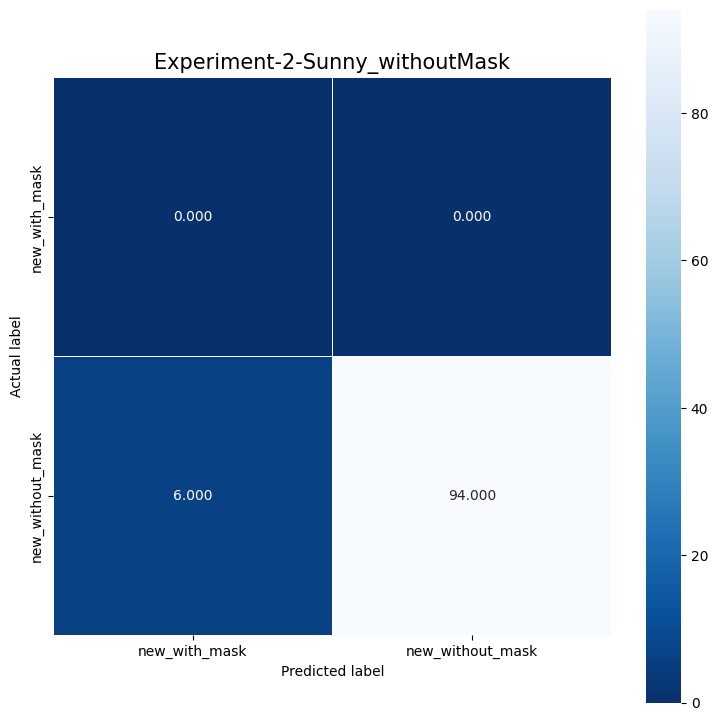

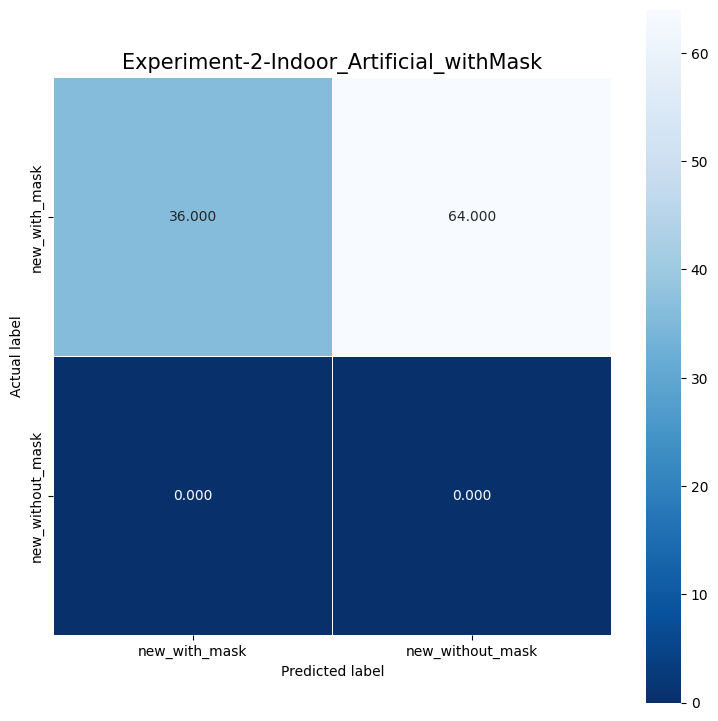

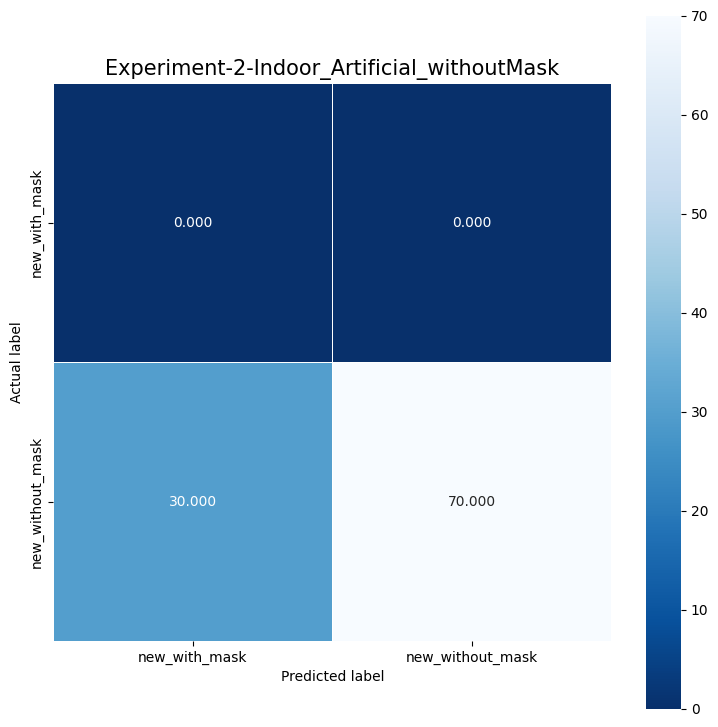

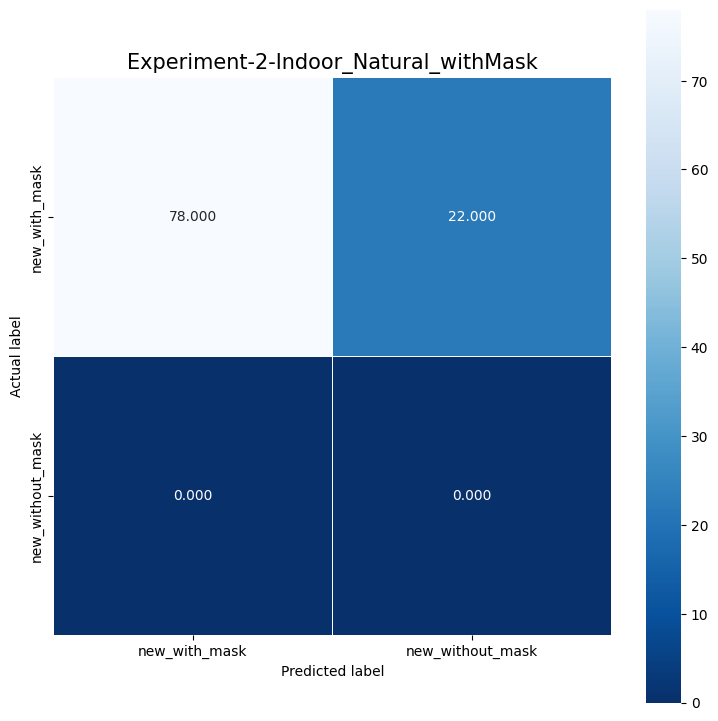

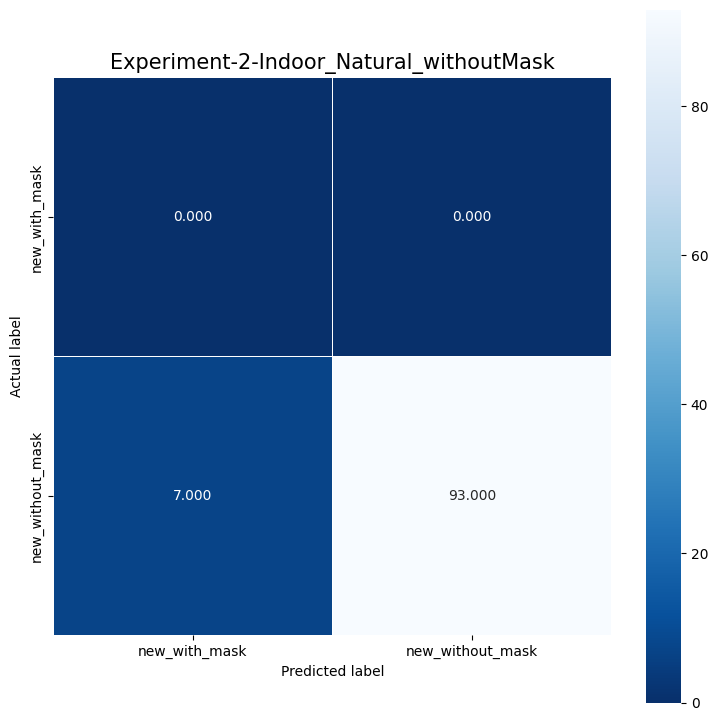

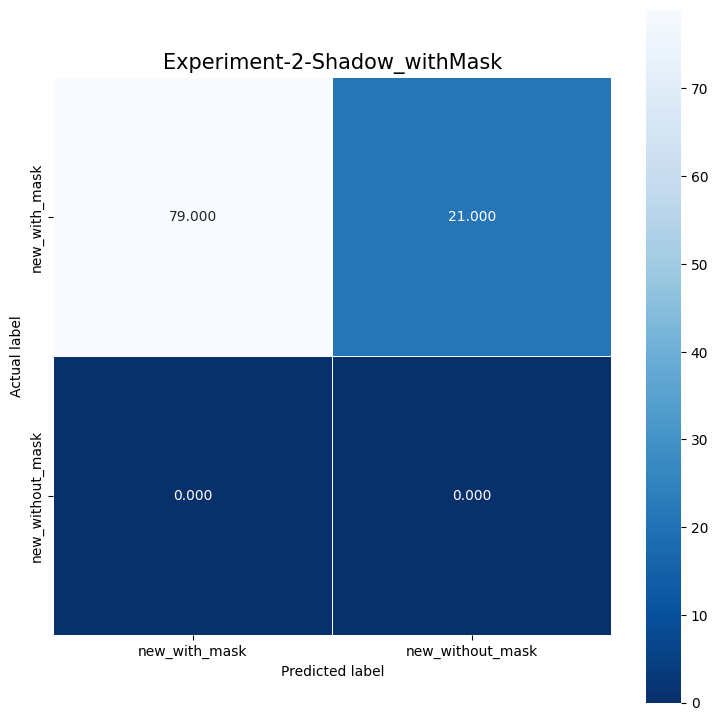

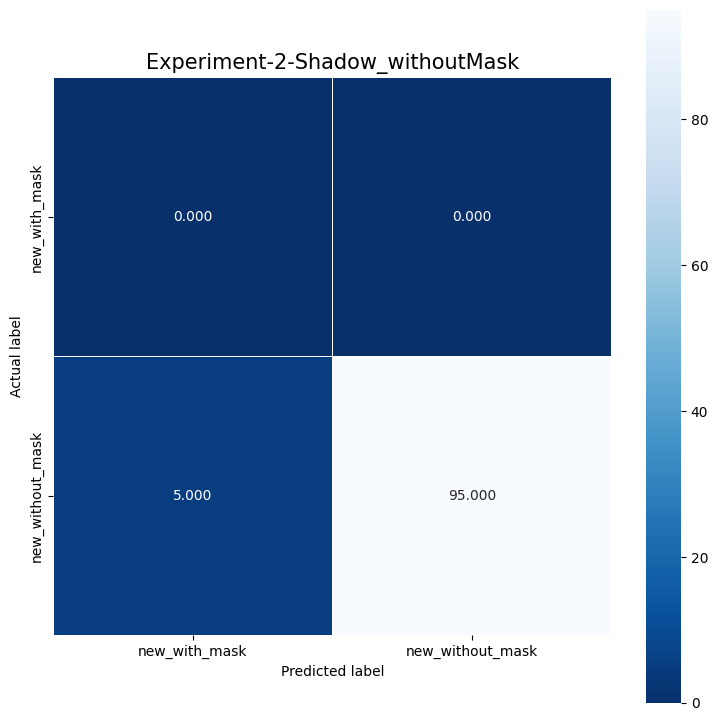

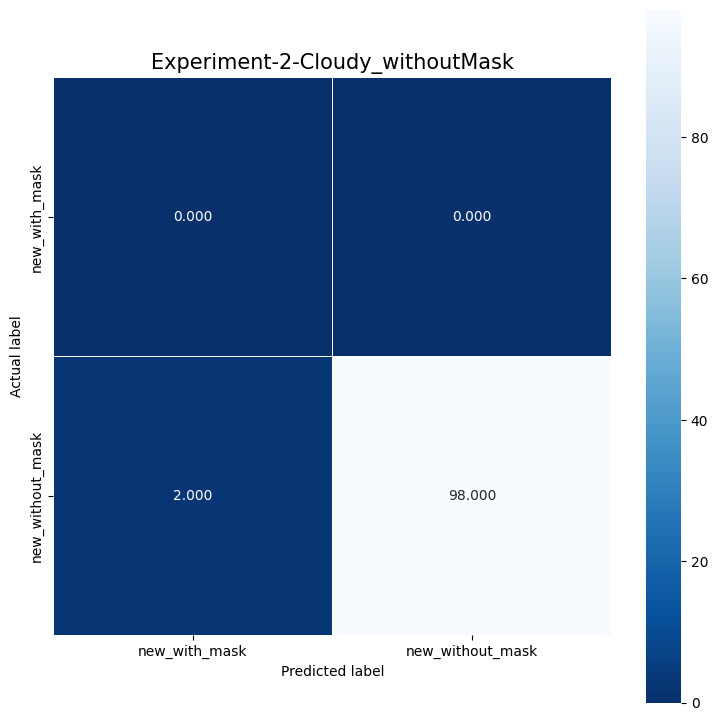

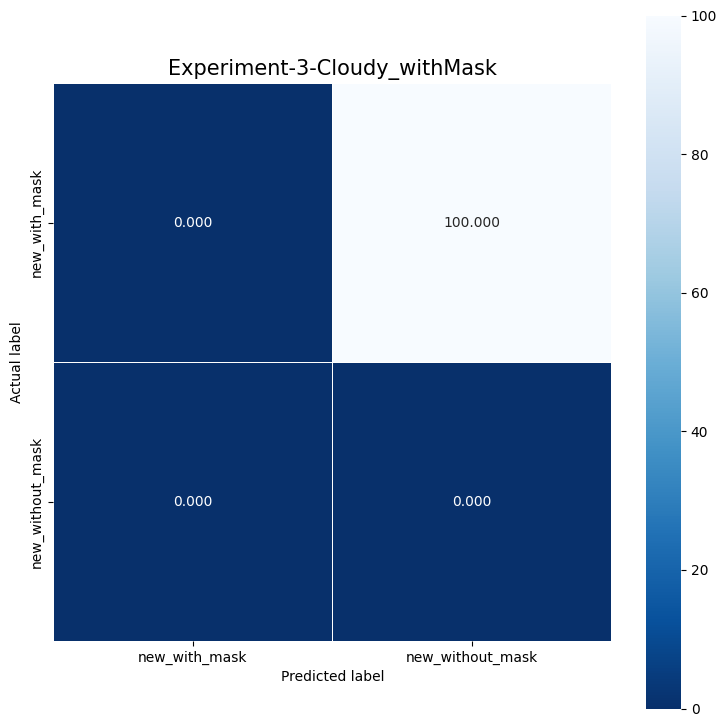

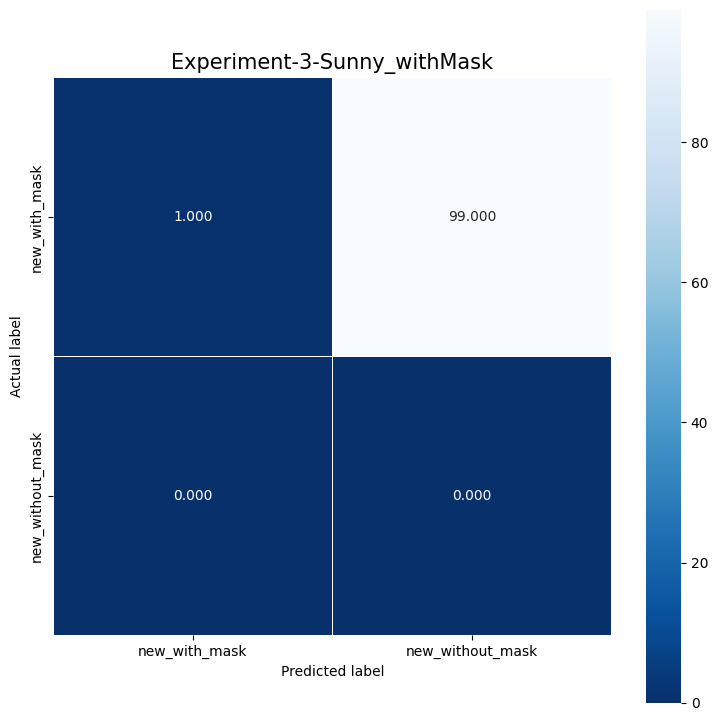

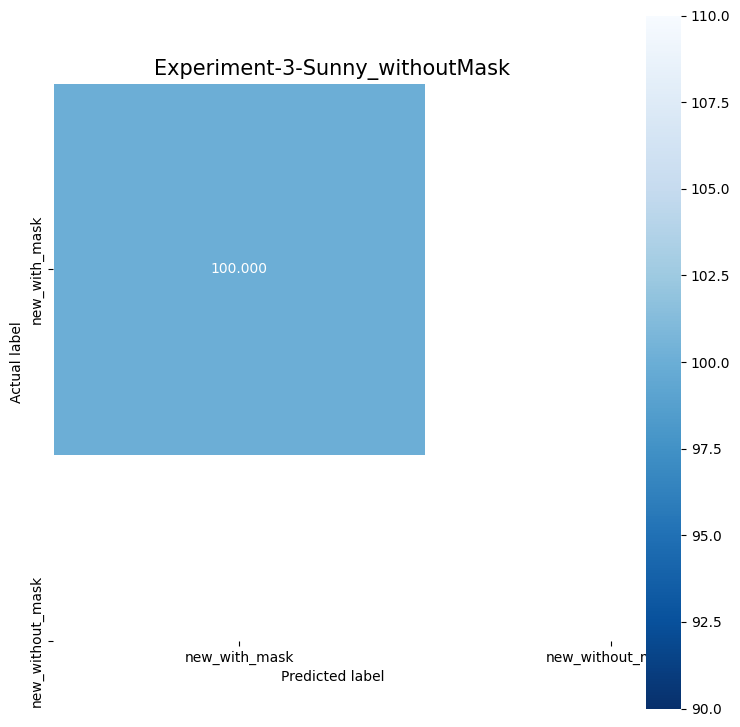

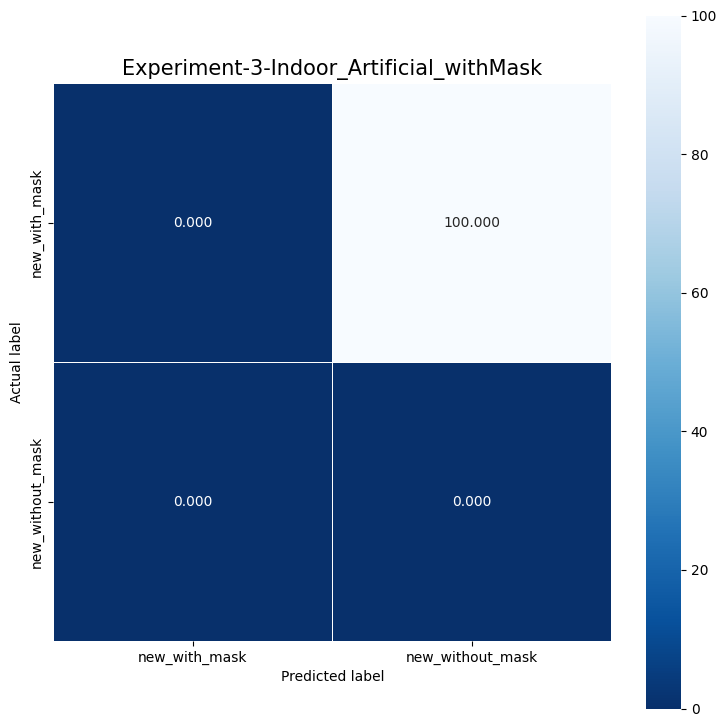

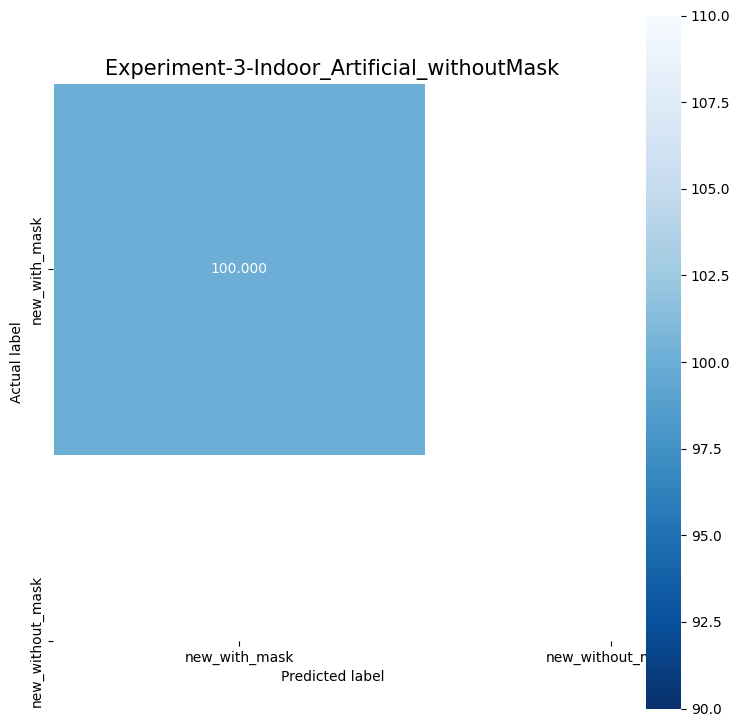

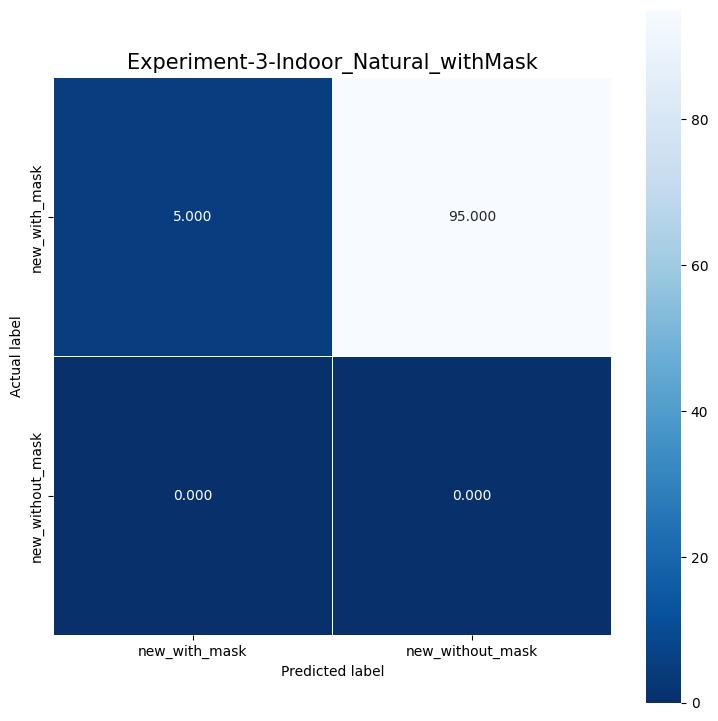

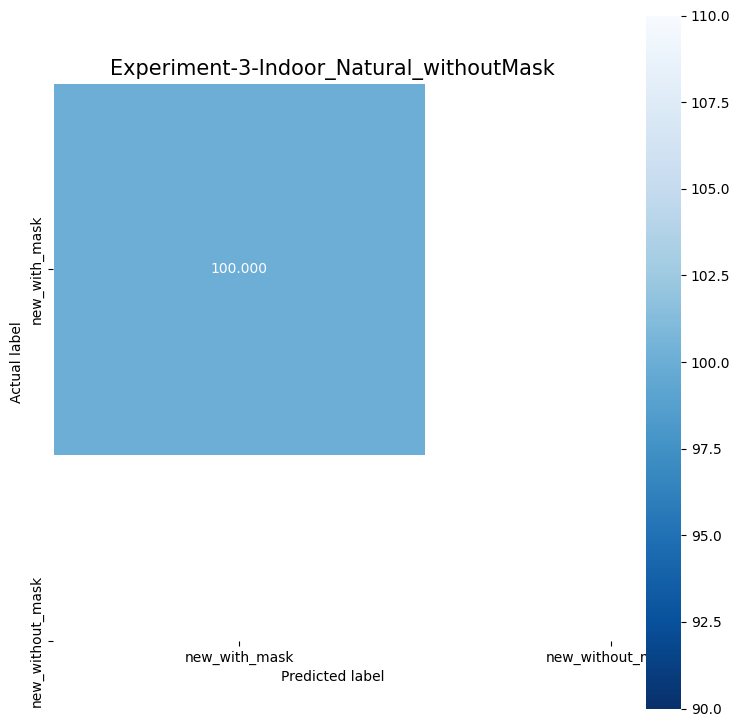

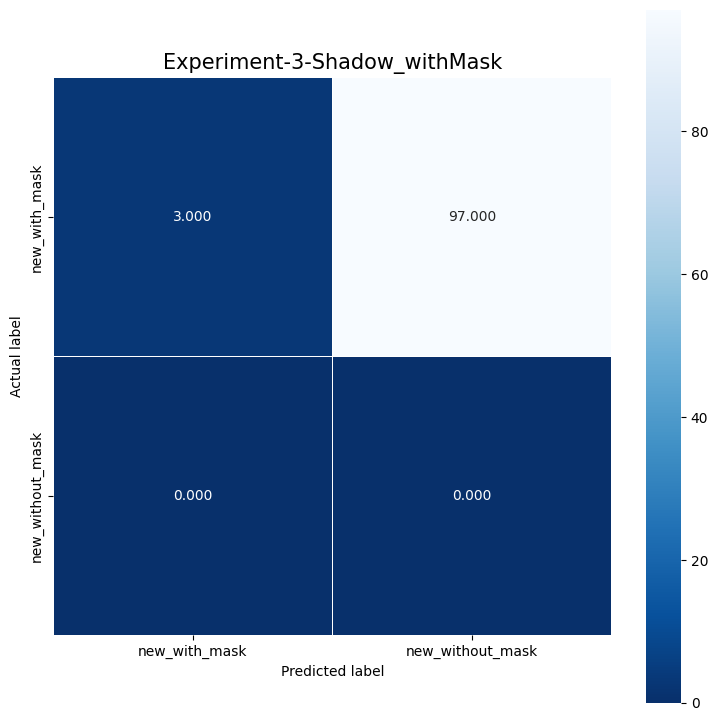

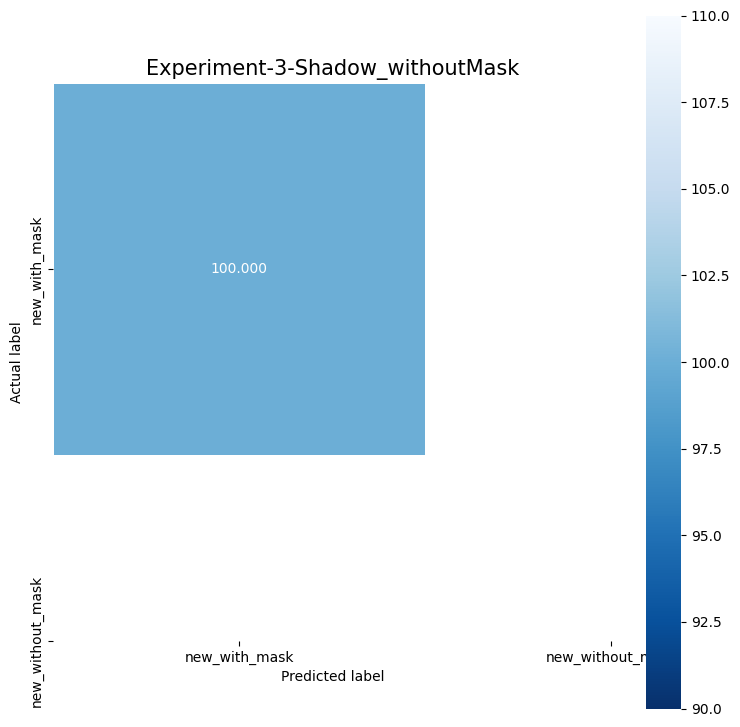

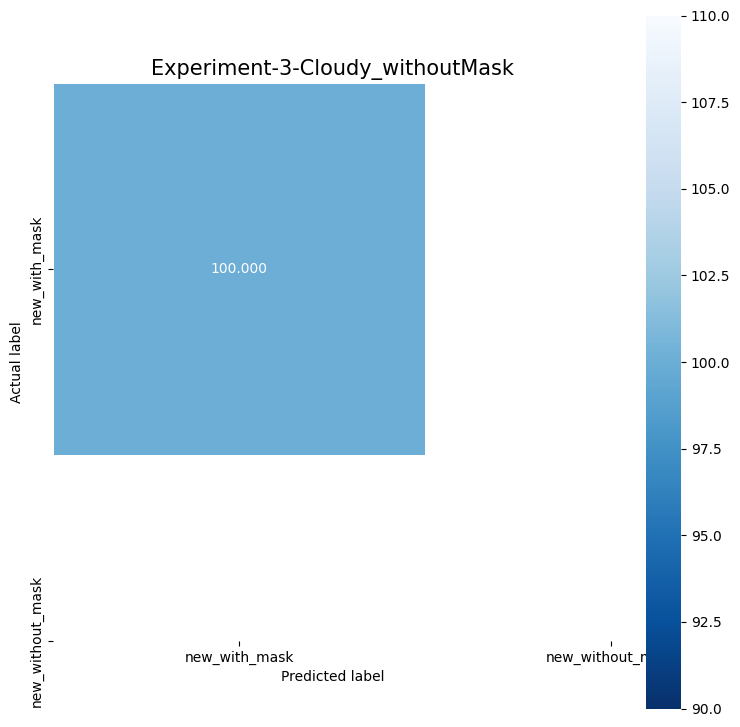

In [ ]:
# function call for all 3 experiment 
# and output of the experiments will be saved to excel file in Google Drive 
# This section take 5 to 6 min to run

excel_path = '/content/gdrive/MyDrive/Assignment2/Excel'

#create folder if not exists 
if not os.path.exists(excel_path):
  os.makedirs(excel_path)


df_experiment_1 = predict_for_experiment(1)
df_experiment_2 = predict_for_experiment(2)
df_experiment_3 = predict_for_experiment(3)

# create an ExcelWriter object
writer = pd.ExcelWriter(excel_path +'/results.xlsx')
 
# write each DataFrame to a different sheet in the Excel file
df_experiment_1.to_excel(writer, sheet_name='Experiment_1', index=False)
df_experiment_2.to_excel(writer, sheet_name='Experiment_2', index=False)
df_experiment_3.to_excel(writer, sheet_name='Experiment_3', index=False)

# save the Excel file
writer.save()

# Image verification 

Following section will allow individual image to be verified with model 

In [ ]:
def img_preprocessing(path):
    sample_mask_img = cv.imread(path)
    sample_mask_img = cv.resize(sample_mask_img,(256,256))
    plt.imshow(sample_mask_img)
    sample_mask_img = np.reshape(sample_mask_img,[1,256,256,3])
    sample_mask_img = sample_mask_img/255.0
    res = np.argmax(model.predict(sample_mask_img))
    print('            ', class_names[res])

1/1 [==============================] - 1s 910ms/step
             new_with_mask


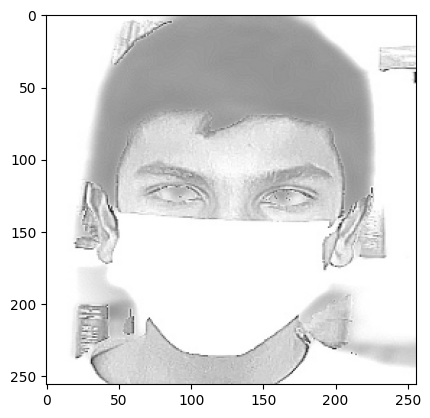

In [ ]:
img_preprocessing('/content/gdrive/MyDrive/Assignment2/Images/Experiment3/Indoor_Natural_withMask/Indoor_Natural_withMask10.jpg')

1/1 [==============================] - 0s 71ms/step
             new_without_mask


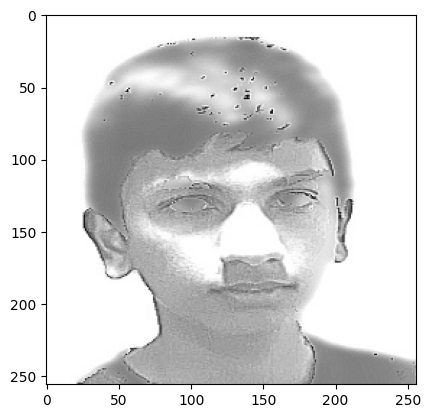

In [ ]:
img_preprocessing('/content/gdrive/MyDrive/Assignment2/Images/Experiment2/Indoor_Artificial_withoutMask/Indoor_Artificial_withoutMask13.jpg')

# Important 

Do not run below code. 
It's to bring training dataset to current session 
in case if you want to do any verification 

In [ ]:
# Important 
# Following code is only required when you want to being training dataset for verification 

!pip install opendatasets
import opendatasets as od

od.download("www.kaggle.com/datasets/pranavsingaraju/facemask-detection-dataset-20000-images")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sachithgunawardane
Your Kaggle Key: ··········


100%|██████████| 604M/604M [00:20<00:00, 31.3MB/s]


1/1 [==============================] - 0s 93ms/step
             0


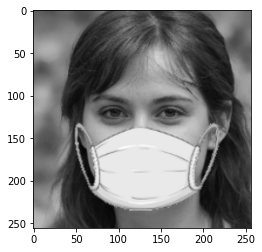

In [ ]:
img_preprocessing('/content/facemask-detection-dataset-20000-images/new_with_mask/with-mask-default-mask-seed0005.png')

1/1 [==============================] - 0s 92ms/step
             1


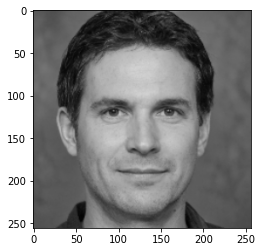

In [ ]:
img_preprocessing('/content/facemask-detection-dataset-20000-images/new_without_mask/seed0020.png')